<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# Quiz 3

This notebook contains 5 parts. You are to fill in this quiz with your answers, taking special care to follow the directions _exactly_.

To **submit** your quiz, drop your completed notebook in the file uploader in the provided Google Form.

### Quiz Information:
- This is an "open book" quiz - you may use any resources! This includes Jupyter notebooks, Google, StackOverflow, and your notes. ANY RESOURCE YOU USE MUST BE CITED (comment your code with links, which lesson you got the inspiration from, etc.) and failure to cite resources you use will be considered plagiarism. 
- You may NOT work with anyone else on this quiz (your classmates, your instructor, etc.).
- You will have one hour to take this quiz.

## Part 1: Getting the data
The dataset provided in this repository (`./data/concrete.csv`) consists of various amounts of different components used to create concrete and the concrete's [compressive strength](https://www.aboutcivil.org/compressive-strength-of-concrete.html). A data dictionary for this dataset can be found in the README.

**Read in the data and display the first 5 rows.**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
concrete = pd.read_csv('./data/concrete.csv')

In [3]:
concrete.head()

,Unnamed: 0,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30


## Part 2: Data Cleaning

There are a few issues with this dataset. To help you identify and fix these issues, you are told:
- The `Unnamed: 0` column should not be a part of this dataset.
- Any null values in this dataset are clerical errors. They should all be 0's.
- All columns in this dataset should be numeric.

**Please clean up the dataset.**

In [4]:
concrete.drop('Unnamed: 0', axis = 1, inplace = True)
concrete

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,NaN,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,NaN,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,NaN,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
concrete.isna().sum()

Cement                             0
Blast Furnace Slag                 0
Fly Ash                            0
Water                              0
Superplasticizer                 379
Coarse Aggregate                   0
Fine Aggregate                     0
Age                                0
Concrete compressive strength      0
dtype: int64

In [6]:
concrete['Superplasticizer'] = concrete['Superplasticizer'].replace(np.nan, 0)

In [7]:
concrete.isna().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [8]:
concrete.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
concrete.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                               object
Concrete compressive strength    float64
dtype: object

In [10]:
concrete['Age'] = concrete['Age'].str.replace("'",'').astype('float')

In [11]:
concrete.dtypes

Cement                           float64
Blast Furnace Slag               float64
Fly Ash                          float64
Water                            float64
Superplasticizer                 float64
Coarse Aggregate                 float64
Fine Aggregate                   float64
Age                              float64
Concrete compressive strength    float64
dtype: object

## Part 3: EDA

You are asked to give the following to the hiring manager:
- Descriptive statistics of the Water column
- A scatterplot of Coarse Aggregate compared to Fine Aggregate colored purple with a title and axis labels

**Please display these.**

In [12]:
concrete['Water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

C:\Users\Lindsey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


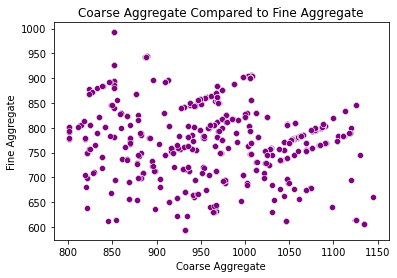

In [13]:
sns.scatterplot(concrete['Coarse Aggregate'], concrete['Fine Aggregate'], color = 'purple')
plt.title('Coarse Aggregate Compared to Fine Aggregate');

## Part 4: Modeling

**Fit a linear regression model to predict the concrete compressive strength. Use *all* columns (other than your target) in your model to predict the concrete compressive strength.**
* Print out and interpret the testing R<sup>2</sup>.

In [14]:
X = concrete.drop('Concrete compressive strength', axis = 1)

In [15]:
y = concrete['Concrete compressive strength']

In [16]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270.0
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365.0
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360.0


In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X, y)

LinearRegression()

In [19]:
lr.score(X, y)

0.6155198704142721

The R<sup>2</sup> score is high, so the model is good at predicting the compressive strength.

## Part 5: Interpretation

The firm is especially interested in learning more about the effects of [superplasticizer](https://en.wikipedia.org/wiki/Superplasticizer).

**They ask you what effect the Superplasticizer has on the concrete compressive strength. How would you respond? Be as specific as possible.**

*Hint: you may want to check out the data dictionary in the README.*

In [20]:
# Superplasticizer is measured in kg (in a cubic meter of concrete)
# Concrete compressive strength is measured in MPa (Megapascal Pressure Unit)

In [21]:
x = concrete[['Superplasticizer']]
y = concrete['Concrete compressive strength']

In [22]:
lr2 = LinearRegression()

In [23]:
lr2.fit(x, y)

LinearRegression()

In [24]:
lr2.score(x, y)

0.13401370771572163

In [25]:
lr2.coef_

array([1.02373298])

In [26]:
lr2.intercept_

29.46604592163058

Superplasticizer on it's own is not as good of a predictor of concrete compressive strength as all columns combined.<br>
The coefficient tells us that for every one kg increase in superplasticizer, the concrete compressive strength would be expected to increase by 1.024 mPa, holding everything else constant.